# Exploratory Data Analysis

In this notebook, we will explore the data and try to find some insights for preparing the data for our goal-conditioned model.

The framework we will use is [robomimi](https://robomimic.github.io/) which is a framework for simulating robotic tasks. It is built on top of [mujoco](http://www.mujoco.org/) a physics engine for simulating robotic tasks. 



In [1]:
# imports
import os
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.obs_utils as ObsUtils
import helper
import h5py
import numpy as np

# change this to the path of the project
%cd /project
%load_ext autoreload
%autoreload 2

/project


In [2]:
# Project directory structure
ROOT_DIR = os.getcwd()
WS_DIR = os.path.join(ROOT_DIR, "src/")
DATA_DIR = os.path.join(ROOT_DIR, "data/")
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Downloading the data
There are 5 different tasks with proficient human demonstrations. The tasks we will explore from these 5 tasks are:
- Lift, a task where the robot has to lift a box from the table.
- Can, a task where the robot has to take a can from one place to the desired place.

In [4]:
## download the dataset
# user parameters
task_1 = "lift"
task_2 = "can"
task_3 = "square"
dataset_type = "ph"
hdf5_type = "low_dim"

# download the dataset
lift_data_path = helper.download_dataset(task_1, dataset_type, hdf5_type, DATA_DIR+task_1)
can_data_path = helper.download_dataset(task_2, dataset_type, hdf5_type, DATA_DIR+task_2)
square_data_path = helper.download_dataset(task_3, dataset_type, hdf5_type, DATA_DIR+task_3)

low_dim_v141.hdf5: 53.0MB [00:16, 3.22MB/s]                            


In [15]:
!python3 /robomimic/robomimic/scripts/get_dataset_info.py --dataset {square_data_path}


total transitions: 30154
total trajectories: 200
traj length mean: 150.77
traj length std: 20.31765488436104
traj length min: 107
traj length max: 236
action min: -1.0
action max: 1.0

==== Filter Keys ====
filter key 20_percent with 40 demos
filter key 20_percent_train with 36 demos
filter key 20_percent_valid with 4 demos
filter key 50_percent with 100 demos
filter key 50_percent_train with 90 demos
filter key 50_percent_valid with 10 demos
filter key train with 180 demos
filter key valid with 20 demos

==== Env Meta ====
{
    "env_name": "NutAssemblySquare",
    "env_version": "1.4.1",
    "type": 1,
    "env_kwargs": {
        "has_renderer": false,
        "has_offscreen_renderer": false,
        "ignore_done": true,
        "use_object_obs": true,
        "use_camera_obs": false,
        "control_freq": 20,
        "controller_configs": {
            "type": "OSC_POSE",
            "input_max": 1,
            "input_min": -1,
            "output_max": [
                0.05,
  

## Exploring the data
### Task: Lift

In [10]:
with h5py.File(lift_data_path, 'r') as hdf5_file:
    states, goal_state, actions = helper.extract_trajectory_i(hdf5_file, trajectory_idx=0)

Extracting Trajectory 0:
    - Actions: (59, 7)
    - States: (59, 19)
    - Goal State: (19,)


In [11]:
states[0]

array([-0.09049418, -0.01522947,  1.01184797,  0.99722759, -0.00723282,
        0.0740351 ,  0.00190572,  0.020833  , -0.020833  ,  0.02644941,
        0.02698126,  0.83142407,  0.        ,  0.        ,  0.96910941,
        0.2466312 , -0.11694359, -0.04221072,  0.18042389])

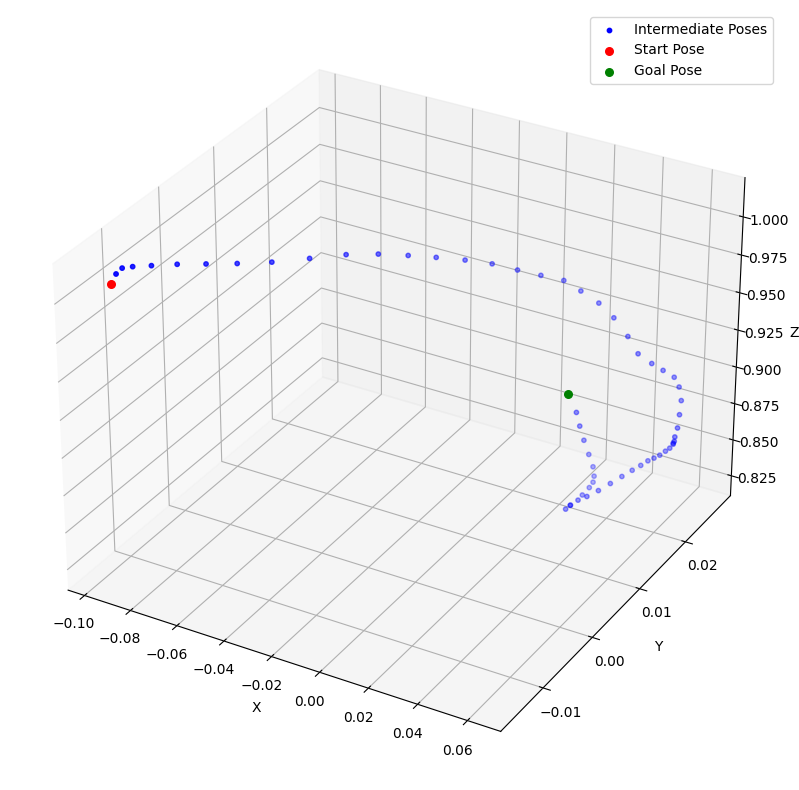

In [12]:
end_eff_pos = states[:, :3]
end_eff_goal_pos = goal_state[:3]
helper.plot_end_effector_trajectory(end_eff_pos, end_eff_goal_pos)

### Task: Can

In [35]:
with h5py.File(can_data_path, 'r') as hdf5_file:
    states, goal_state, actions = helper.extract_trajectory_i(hdf5_file, trajectory_idx=0)

Extracting Trajectory 0:
    - Actions: (118, 7)
    - States: (118, 23)
    - Goal State: (23,)


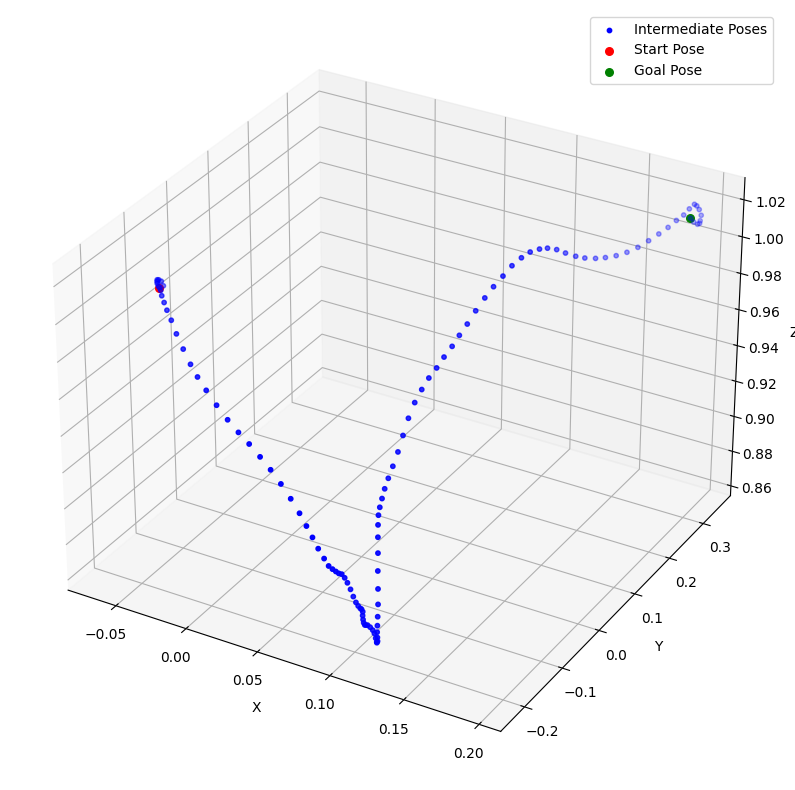

In [36]:
end_eff_pos = states[:, :3]
end_eff_goal_pos = goal_state[:3]
helper.plot_end_effector_trajectory(end_eff_pos, end_eff_goal_pos)

### Task: Square

In [13]:
with h5py.File(square_data_path, 'r') as hdf5_file:
    states, goal_state, actions = helper.extract_trajectory_i(hdf5_file, trajectory_idx=0)

Extracting Trajectory 0:
    - Actions: (127, 7)
    - States: (127, 23)
    - Goal State: (23,)


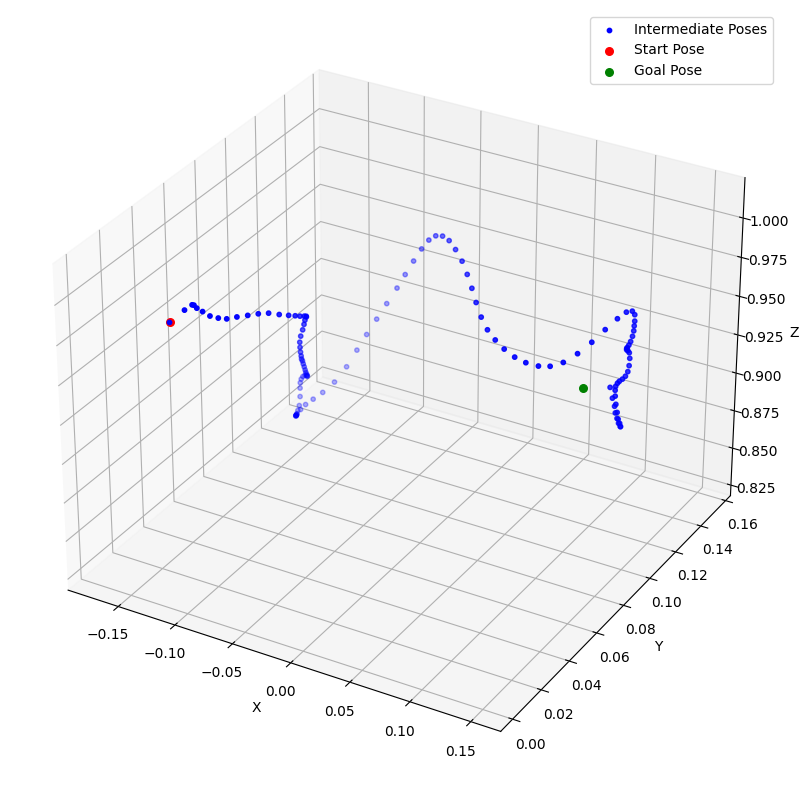

In [14]:
end_eff_pos = states[:, :3]
end_eff_goal_pos = goal_state[:3]
helper.plot_end_effector_trajectory(end_eff_pos, end_eff_goal_pos)

In [19]:
actions.shape

(127, 7)

In [25]:
states.shape

(165, 23)

In [26]:
# get actions and states max and min values
# Initialize the max and min action values with infinity and -infinity for the 7 dimensions
max_action = np.array([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf])
min_action = np.array([np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
# Initialize the max and min state values with infinity and -infinity for the 23 dimensions
max_state = np.array([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, 
                      -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, 
                      -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf])
min_state = np.array([np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf,
                      np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf,
                        np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
# loop through all trajectories
with h5py.File(square_data_path, 'r') as hdf5_file:
    for traj in range(len(hdf5_file["data"])):
        states, goal_state, actions = helper.extract_trajectory_i(hdf5_file, trajectory_idx=traj, verbose=False)
        # check the max and min values for each dimension
        for i in range(actions.shape[1]):
            max_action[i] = max(max_action[i], np.max(actions[:, i]))
            min_action[i] = min(min_action[i], np.min(actions[:, i]))
        for i in range(states.shape[1]):
            max_state[i] = max(max_state[i], np.max(states[:, i]))
            min_state[i] = min(min_state[i], np.min(states[:, i]))
print("Max action values: ", max_action.tolist())
print("Min action values: ", min_action.tolist())   
print("Max state values: ", max_state.tolist())
print("Min state values: ", min_state.tolist())

Max action values:  [1.0, 1.0, 1.0, 0.2512921094894409, 0.39740705490112305, 1.0, 1.0]
Min action values:  [-1.0, -1.0, -1.0, -0.3012969493865967, -1.0, -1.0, -1.0]
Max state values:  [0.2695516773435971, 0.31146887962884134, 1.0866492392492837, 0.9999998938152184, 0.7458346429557865, 0.1806822736664122, 0.13211838798655506, 0.041877319637924154, -0.0003920061690194544, 0.2697740589203591, 0.2468016989114689, 1.0694777832870546, 0.21079789326049436, 0.49256304337270046, 0.9999986484724326, 0.9997796328997269, 0.14990347974394047, 0.18911522833983985, 0.213085651240276, 0.9999980926513672, 0.9999931454658508, 0.2584075927734375, 0.7574875354766846]
Min state values:  [-0.21917232327303815, -0.0486947688474385, 0.8275588849013535, 0.6619301462837582, -0.7431493912571426, -0.134370933631542, -0.12024449352673772, -0.0013291330114691287, -0.041642336121022604, -0.13853475265013518, 0.042800253541765615, 0.8210219482283563, -0.506338214843115, -0.2542512456083963, -0.9998087185689054, -0.99

**Conclusion:** The dataset is a collection of trajectories. Each trajectory is a sequence of states, actions, and a goal state. 

The goal state is the state at the end of the trajectory. The desired state.

The actions are the actions taken to get from one state to the next. 

The states are the observations of the robot at each time step. The observations include:
 * `the end effector position`, 
 * `end effector rotation`,
 * `gripper joints`, 
 * `object`.
 
`object` describes the object to be manipulated. It varies from task to task. For example, the object for the lift task is a box. The object for the can task is a can. The object for the square task is a square.

Therefore the state size varies from task to task, which means the observation space varies from task to task whereas The action size is the same for all tasks. This means that our model will have to be able to handle different observation sizes.

The action space is 7 dimensional. The min and max values are: -1.0 and 1.0.

The state space is 19 dimensional for the Lift task and 23 dimensional for the Can and Square tasks. The min and max values are: -1.0 and 1.0

Thus both the action and state spaces are normalized to [-1.0, 1.0]

Finally, the Lift task has shorter trajectories, followed by the Can task, and then the Square task. This is mostlikely due to the complexity of the tasks. The Lift task is the simplest task, followed by the Can task, and then the Square task which is the most complex out of the 3.

## Structure of the whole data

In [10]:

def print_structure(hdf5_object, indent=0):
    """
    Recursively prints the structure of an HDF5 file or group.

    Args:
        hdf5_object: h5py.File or h5py.Group object
        indent (int): current indentation level for pretty printing
    """
    space_indentation = '    ' * indent
    keys = list(hdf5_object.keys())

    for key in keys:
        print(f"{space_indentation}{key}")
        if isinstance(hdf5_object[key], h5py.Group):
            print_structure(hdf5_object[key], indent + 1)
        elif isinstance(hdf5_object[key], h5py.Dataset):
            # For datasets, you might want to print additional info (e.g., shape, dtype)
            print(f"{space_indentation}    - Shape: {hdf5_object[key].shape}, Type: {hdf5_object[key].dtype}")

# Load the dataset
with h5py.File(can_data_path, 'r') as hdf5_file:
    print_structure(hdf5_file)


data
    demo_0
        actions
            - Shape: (118, 7), Type: float64
        dones
            - Shape: (118,), Type: int64
        next_obs
            object
                - Shape: (118, 14), Type: float64
            robot0_eef_pos
                - Shape: (118, 3), Type: float64
            robot0_eef_quat
                - Shape: (118, 4), Type: float64
            robot0_eef_vel_ang
                - Shape: (118, 3), Type: float64
            robot0_eef_vel_lin
                - Shape: (118, 3), Type: float64
            robot0_gripper_qpos
                - Shape: (118, 2), Type: float64
            robot0_gripper_qvel
                - Shape: (118, 2), Type: float64
            robot0_joint_pos
                - Shape: (118, 7), Type: float64
            robot0_joint_pos_cos
                - Shape: (118, 7), Type: float64
            robot0_joint_pos_sin
                - Shape: (118, 7), Type: float64
            robot0_joint_vel
                - Shape: (118, 7), T